![](https://cdn.images.express.co.uk/img/dynamic/143/590x/League-of-Legends-servers-down-1259147.webp?r=1585327760984)

In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 20.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=2ffd13bcec1495abd2b7689ee7864a6a4277cc975a7da1

### Set UP

In [ ]:
# Load packages and dataset
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-2-0f427071d385>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


# EDA

In [ ]:

# check missing values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
df_clean = df.copy()

In [ ]:
# Bỏ bớt những cột không cần thiết ví dụ blueFirstblood/ redfirst blood blueEliteMonster /redEliteMonster blueDeath/redKills, mimion yield gold+experience, etc và những cột lặp lại ở hai bên đội đỏ và đội xanh
#  
cols = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds',
       'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueTotalMinionsKilled']
df_clean = df_clean.drop(cols, axis = 1)

In [ ]:
df_clean

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,blueTotalExperience,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redDeaths,redAssists,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience
0,0,28,2,1,9,6,11,0,0,0,...,17039,36,15,6,9,8,0,16567,6.8,17047
1,0,12,1,0,5,5,5,0,0,0,...,16265,43,12,1,5,2,1,17620,6.8,17438
2,0,15,0,0,7,11,4,1,1,0,...,16221,46,15,3,7,14,0,17285,6.8,17254
3,0,43,1,0,4,5,5,1,0,1,...,17954,55,15,2,4,10,0,16478,7.0,17961
4,0,75,4,0,6,6,6,0,0,0,...,18543,57,17,2,6,7,0,17404,7.0,18313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,18967,69,46,3,7,7,0,15246,6.8,16498
9875,1,54,0,0,6,4,8,1,1,0,...,19255,48,12,21,6,3,0,15456,7.0,18367
9876,0,23,1,0,6,7,5,0,0,0,...,18032,45,14,0,6,11,0,18319,7.4,19909
9877,0,14,4,1,2,3,3,1,1,0,...,17229,48,66,4,2,1,0,15298,7.2,18314


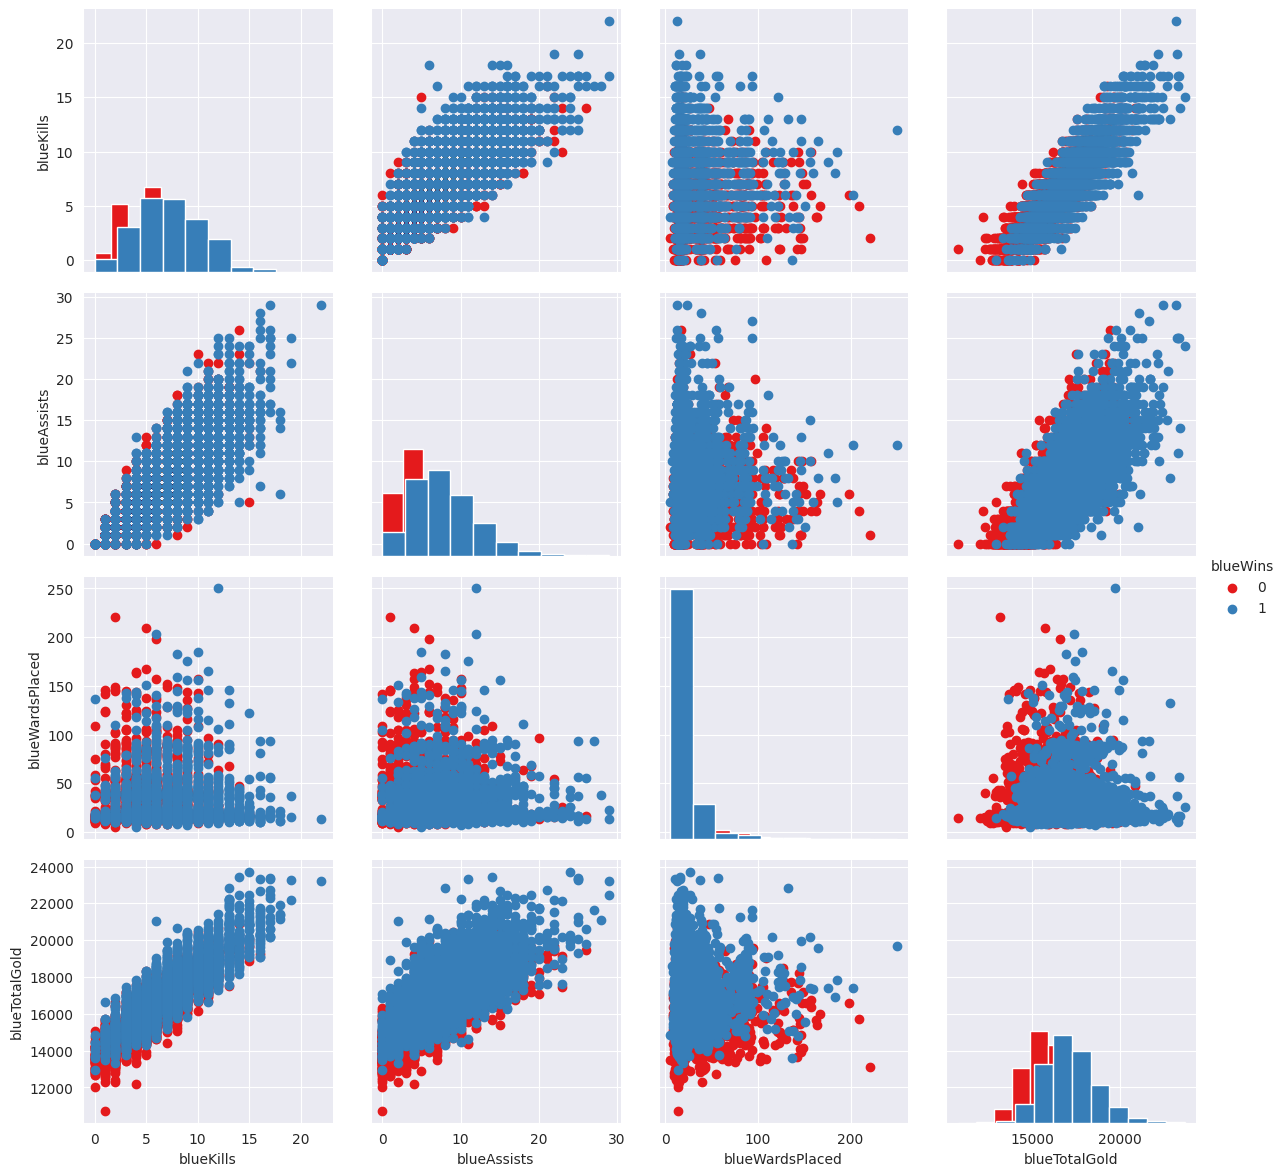

In [ ]:
# Kiểm tra tương quan giữa các yếu tố 
g = sns.PairGrid(data=df_clean, vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'], hue='blueWins', height=3, palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

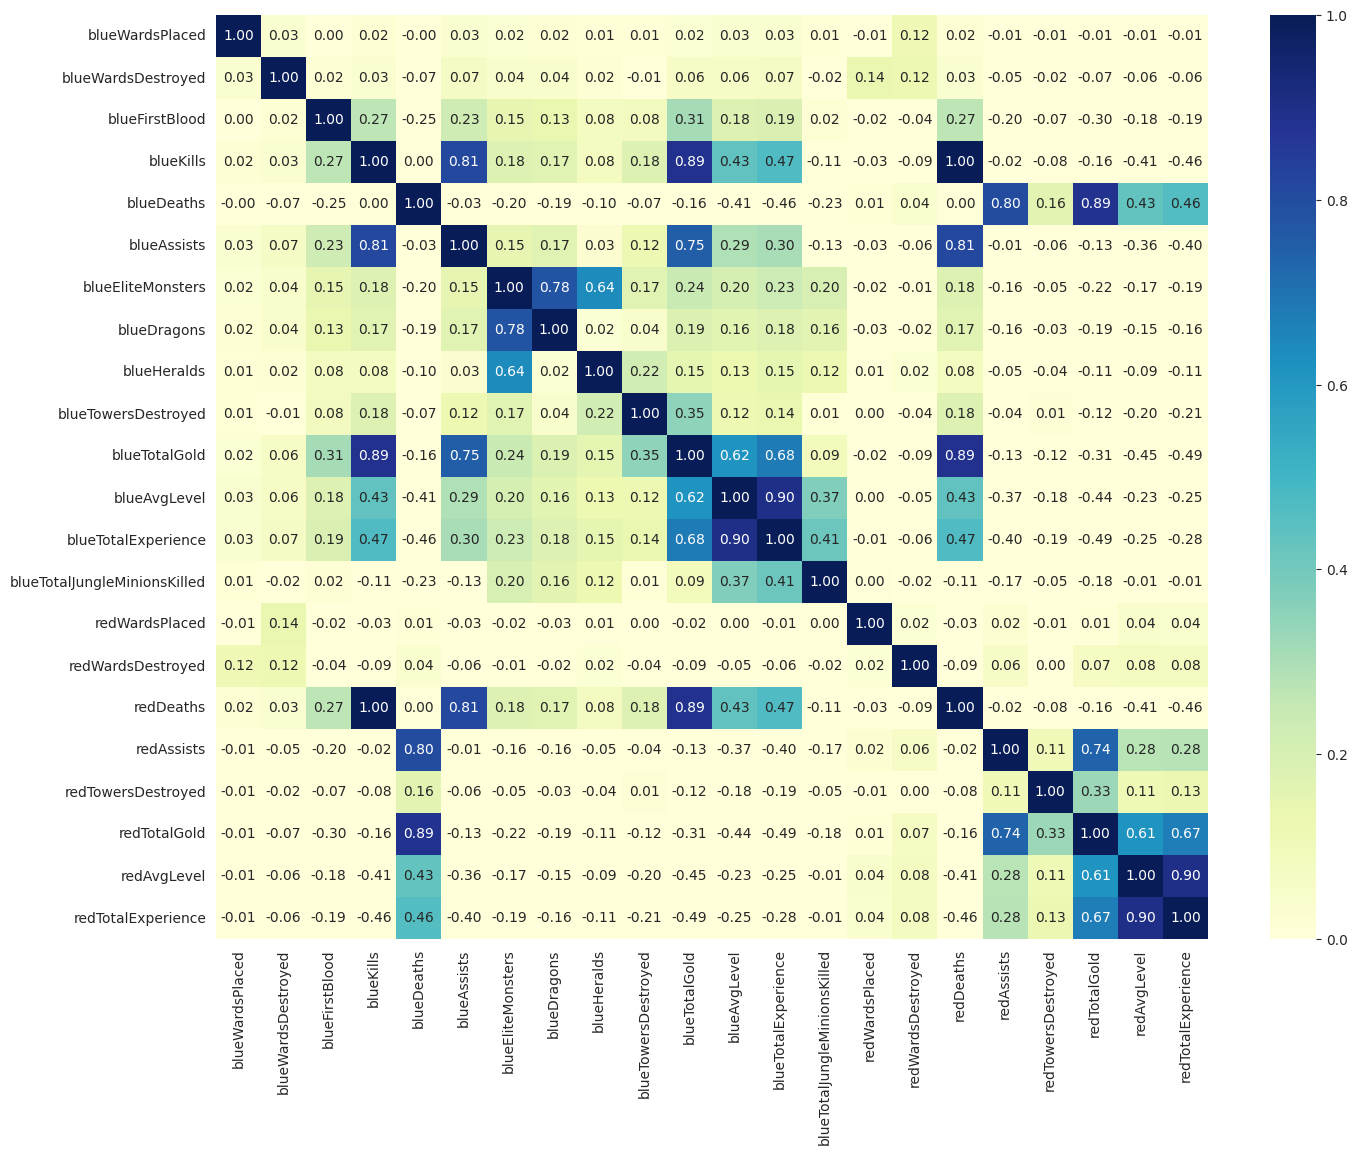

In [ ]:
# Tiếp theo kiểm tra ma trận tương quan để nhìn rõ hơn về sự tương quan
plt.figure(figsize=(16, 12))
sns.heatmap(df_clean.drop('blueWins', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [ ]:
# Dựa vào bảng tương quan ta thấy có một số biến cần được loại bỏ để làm sạch dữ liệu tránh hợp đa cộng tuyến giữa các biến dữ liệu 
#các biến loại bỏ dựa vào tỉ lệ tương quan với win rate và ý kiến chủ quancủa người làm phân tích
# blueAvgLevel,redDeaths,redTotalExperience bị dồn tương quan gần các biến ,
# redWardsPlaced ,redWardsDestroyed,redTowersDestroyed ko có tương quan với tỉ lệ thắng ,
# redTotalGold', 'redAvgLevel không ảnh hưởng nhiều đến tỉ lệ thắng của đội xanh 
cols = ['blueAvgLevel', 'redWardsPlaced', 'redWardsDestroyed', 'redDeaths', 'redAssists', 'redTowersDestroyed',
       'redTotalExperience', 'redTotalGold', 'redAvgLevel']
df_clean = df_clean.drop(cols, axis=1)

In [ ]:
# Tiếp tục loại bỏ những cột dữ liệu ít tương quan đến tỉ lệ blue_win
corr_list = df_clean[df_clean.columns[1:]].apply(lambda x: x.corr(df_clean['blueWins']))
cols = []
for col in corr_list.index:
    if (corr_list[col]>0.2 or corr_list[col]<-0.2):
        cols.append(col)
cols

['blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueTotalGold',
 'blueTotalExperience']

In [ ]:
df_clean = df_clean[cols]
df_clean.describe()

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,16503.455512,17928.110133
std,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,1535.446636,1200.523764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,10098.000000
25%,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,15415.500000,17168.000000
50%,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,16398.000000,17951.000000
75%,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,17459.000000,18724.000000
max,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,23701.000000,22224.000000


In [ ]:
# phân tích overview cơ bản bằng 
profile = ProfileReport(df_clean)
profile

Output hidden; open in https://colab.research.google.com to view.

,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueTotalGold,blueTotalExperience
0,1,9,6,11,0,0,17210,17039
1,0,5,5,5,0,0,14712,16265
2,0,7,11,4,1,1,16113,16221
3,0,4,5,5,1,0,15157,17954
4,0,6,6,6,0,0,16400,18543
...,...,...,...,...,...,...,...,...
9874,1,7,4,5,1,1,17765,18967
9875,0,6,4,8,1,1,16238,19255
9876,0,6,7,5,0,0,15903,18032
9877,1,2,3,3,1,1,14459,17229


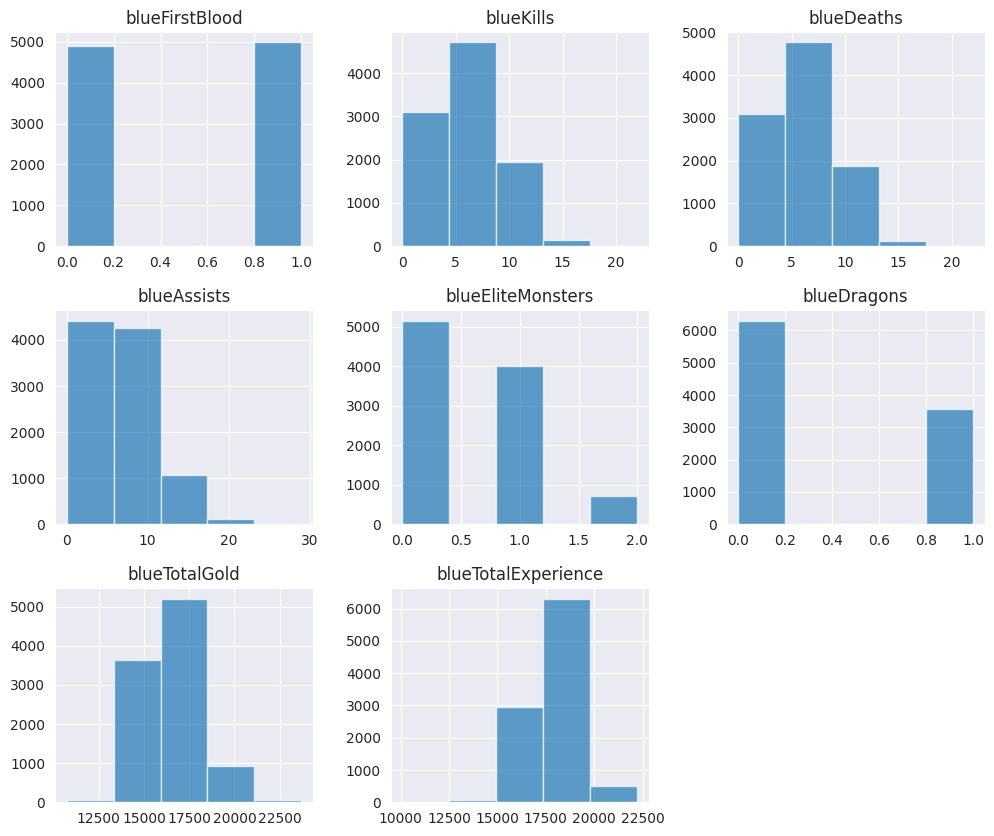

In [ ]:
df_clean.hist(alpha = 0.7, figsize=(12,10), bins=5);
df_clean

# Model Selection

In [ ]:
# train test split scale the set
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = df_clean
y = df['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tìm model phù hợp để phân tích bộ dữ liệu 


`văn bản in đậm`
# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# fit the model
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

pred_nb = clf_nb.predict(X_test)

# the accuracy score
acc_nb = accuracy_score(pred_nb, y_test)
print(acc_nb)

0.7176113360323887



## Decision Tree

In [ ]:
# fit the decision tree model
from sklearn import tree
from sklearn.model_selection import GridSearchCV

tree = tree.DecisionTreeClassifier()

#tìm kiếm các thông số tốt nhất
grid = {'min_samples_split': [5, 10, 20, 50, 100]},

clf_tree = GridSearchCV(tree, grid, cv=5)
clf_tree.fit(X_train, y_train)

pred_tree = clf_tree.predict(X_test)

# the accuracy score
acc_tree = accuracy_score(pred_tree, y_test)
print(acc_tree)

0.6928137651821862




```
# Định dạng của đoạn này là mã
```

## Random Forests

In [ ]:
# fit the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# tìm các thông số tốt nhất
grid = {'n_estimators':[100,200,300,400,500], 'max_depth': [2, 5, 10]}

clf_rf = GridSearchCV(rf, grid, cv=5)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)
# the accuracy score
acc_rf = accuracy_score(pred_rf, y_test)
print(acc_rf)

0.7272267206477733


## Logistic Regression

In [ ]:
# fit logistic regression model
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train, y_train)

# accuracy score
pred_lm = lm.predict(X_test)
acc_lm = accuracy_score(pred_lm, y_test)
print(acc_lm)

0.7302631578947368




## K-nearest neighbours

In [ ]:
# fit the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() 

# search the best params
grid = {"n_neighbors":np.arange(1,100)}
clf_knn = GridSearchCV(knn, grid, cv=5)
clf_knn.fit(X_train,y_train) 

# accuracy score
pred_knn = clf_knn.predict(X_test) 
acc_knn = accuracy_score(pred_knn, y_test)
print(acc_knn)

0.7171052631578947


# Kết luận chung các mô hình


In [ ]:
data_dict = {'Naive Bayes': [acc_nb], 'Decision Tree': [acc_tree], 'Random Forest': [acc_rf], 'Logistic Regression': [acc_lm], 'K_nearest Neighbors': [acc_knn]}
df_c = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Accuracy Score'])
print(df_c)

                     Accuracy Score
Naive Bayes                0.717611
Decision Tree              0.692814
Random Forest              0.727227
Logistic Regression        0.730263
K_nearest Neighbors        0.717105


Từ điểm acuracy ,  có thể thấy rằng hồi quy logistic và random forests dự đoán tốt nhất. Tiếp theos  sẽ kỹ hơn về sự recall và độ chính xác của model này


In [ ]:
# recall and precision
from sklearn.metrics import recall_score, precision_score

# params for lm 
recall_lm = recall_score(pred_lm, y_test, average = None)
precision_lm = precision_score(pred_lm, y_test, average = None)
print('precision score của naive bayes: {}\n recall score của naive bayes:{}'.format(precision_lm, recall_lm))

precision score của naive bayes: [0.72736521 0.73313192]
 recall score của naive bayes:[0.72959184 0.73092369]


In [ ]:
# params for rf
recall_rf = recall_score(pred_rf, y_test, average = None)
precision_rf = precision_score(pred_rf, y_test, average = None)
print('precision score của naive bayes: {}\n recall score của naive bayes:{}'.format(precision_rf, recall_rf))

precision score của naive bayes: [0.73652085 0.71802618]
 recall score của naive bayes:[0.72111554 0.73353909]


dựa vào đây ta chọn phân tích logistic regression

In [ ]:
df_clean.columns

Index(['blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueTotalGold',
       'blueTotalExperience'],
      dtype='object')

In [ ]:
lm.coef_

array([[ 0.09774618,  1.61664247, -4.8653555 , -0.2625516 ,  0.30534437,
         0.2947777 ,  5.35409797,  1.74486909]])

In [ ]:
np.exp(lm.coef_)

array([[1.10268286e+00, 5.03615284e+00, 7.70908711e-03, 7.69086679e-01,
        1.35709227e+00, 1.34282781e+00, 2.11473136e+02, 5.72515194e+00]])

In [ ]:
coef_data = np.concatenate((lm.coef_, np.exp(lm.coef_)),axis=0)
coef_df = pd.DataFrame(data=coef_data, columns=df_clean.columns).T.reset_index().rename(columns={'xếp hạng': 'yếu tố ', 0: 'độ tin cậy', 1: 'tỉ lệ lẻ '})
coef_df.sort_values(by='độ tin cậy', ascending=False)

,index,độ tin cậy,tỉ lệ lẻ
6,blueTotalGold,5.354098,211.473136
7,blueTotalExperience,1.744869,5.725152
1,blueKills,1.616642,5.036153
4,blueEliteMonsters,0.305344,1.357092
5,blueDragons,0.294778,1.342828
0,blueFirstBlood,0.097746,1.102683
3,blueAssists,-0.262552,0.769087
2,blueDeaths,-4.865356,0.007709


### PCA